# Visualization with Seaborn

Since Matplotlib preceded Pandas by about a decade, Matplotlib cannot itself handle handle the datatypes and objects in this library. And also, as seen in the previous tutorials, Matplotlib has a rather low level implementation. This is where Seaborn comes into play. Seaborn seamlessy integrates with it's underlying matplotlib framework and provides a more sane choice of plotting.

## Seaborn Versus Matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
rng=np.random.RandomState(0)
x=np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0)
x,y

(array([ 0.        ,  0.02004008,  0.04008016,  0.06012024,  0.08016032,
         0.1002004 ,  0.12024048,  0.14028056,  0.16032064,  0.18036072,
         0.2004008 ,  0.22044088,  0.24048096,  0.26052104,  0.28056112,
         0.3006012 ,  0.32064128,  0.34068136,  0.36072144,  0.38076152,
         0.4008016 ,  0.42084168,  0.44088176,  0.46092184,  0.48096192,
         0.501002  ,  0.52104208,  0.54108216,  0.56112224,  0.58116232,
         0.6012024 ,  0.62124248,  0.64128257,  0.66132265,  0.68136273,
         0.70140281,  0.72144289,  0.74148297,  0.76152305,  0.78156313,
         0.80160321,  0.82164329,  0.84168337,  0.86172345,  0.88176353,
         0.90180361,  0.92184369,  0.94188377,  0.96192385,  0.98196393,
         1.00200401,  1.02204409,  1.04208417,  1.06212425,  1.08216433,
         1.10220441,  1.12224449,  1.14228457,  1.16232465,  1.18236473,
         1.20240481,  1.22244489,  1.24248497,  1.26252505,  1.28256513,
         1.30260521,  1.32264529,  1.34268537,  1.3

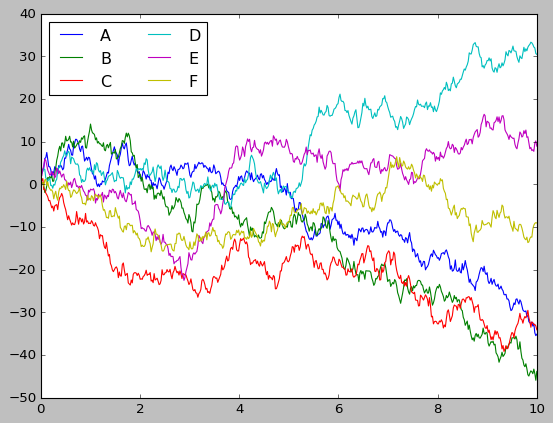

In [3]:
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

Although this visualization does convey whatever it needs to, it doesn't look that aesthetically pleasing and gives more of an old fassioned look.

Now let's look at how the smae problem can be implemented using Seaborn

In [4]:
import seaborn as sns
sns.set_theme()

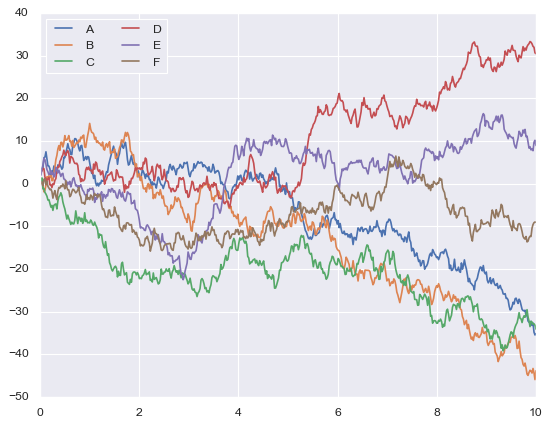

In [5]:
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

This now looks much more aesthetic

## Exploring Seaborn Plots

Seaborn mainly provides a high level of control on the plotting process and is mainly useful for statistical exploration and even statistical model fitting.

Let's look at some common plot types and datasets offered by Seaborn

### Histograms, KDE(Kernel Density Estimation) and densities

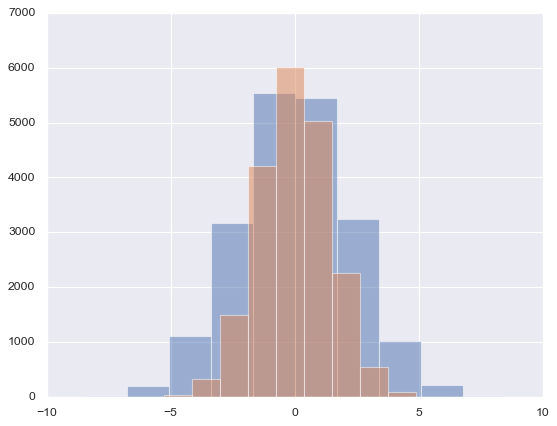

In [6]:
data=np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=20000)
data=pd.DataFrame(data,columns=['x','y'])
for col in 'xy':
    plt.hist(data[col],alpha=.5)

Instead of a Histogram, using Kernel Density Plot provides a continuous plot that represents the data being plot

c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

<Axes: ylabel='Density'>

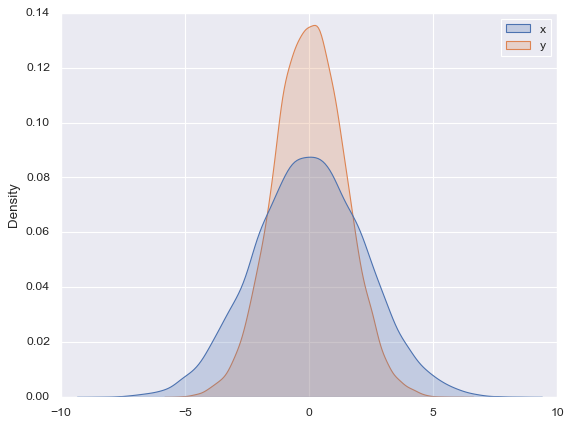

In [7]:
sns.kdeplot(data,fill=True)

If we specify that the data being passed is a distribution on the x-y plane, by setting the arguments as follows, it visualizes the joint distribution as follows

<Axes: xlabel='x', ylabel='y'>

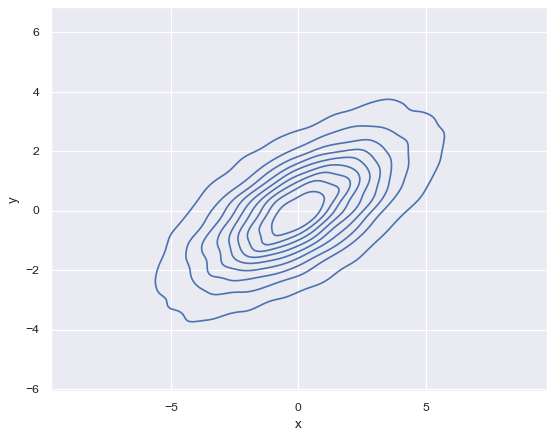

In [8]:
sns.kdeplot(data,x='x',y='y')

### Pair Plots

Generating joint plots of datasets of large dimensions gives us a deep insight into the nature of the data at hand. This is achieved using pairplots.

This is very usefull in exploring correlation between dimensions in multidimensional data. Let's explore this using the well known iris dataset.

In [9]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


visualizing the multidimensional data is as easy as calling `sns.pairplot()`.

c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

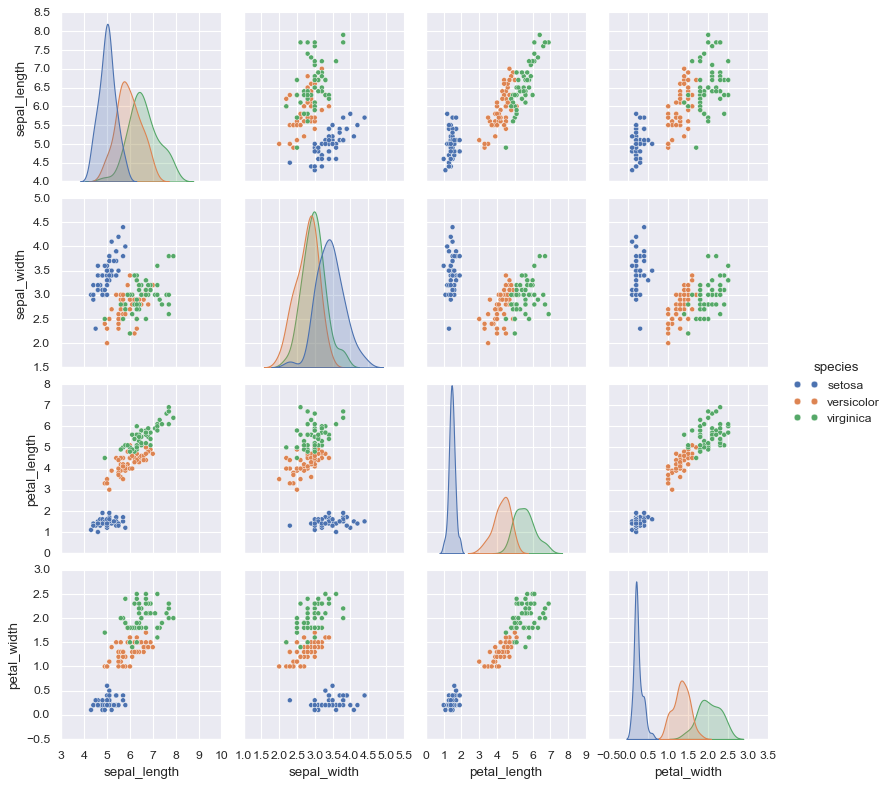

In [10]:
sns.pairplot(
    iris,
    hue='species',
    # height=2.5
    )

### Faceted Histograms

Sometimes the best way to view data is via histograms of subsets, as shown in the following figure. Seaborn's FacetGrid makes this simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data

The restaurant staff data used in this section divides employees into two sexes: female and male. Biological sex isn’t binary, but the following discussion and visualizations are limited by this data.

In [11]:
tips=sns.load_dataset('tips')
# sns.get_dataset_names()
tips['tip%']=tips['tip']*100/tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


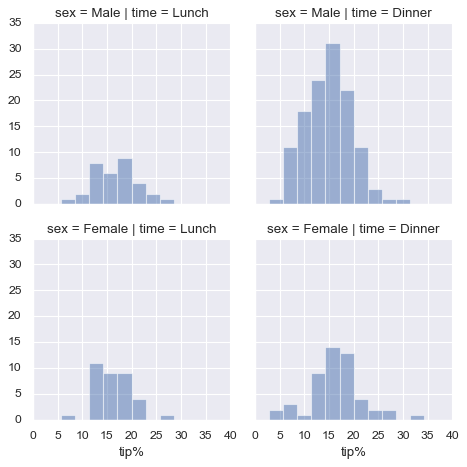

In [12]:
grid=sns.FacetGrid(
    tips,
    row='sex',
    col='time',
    # hue='smoker'
    )
grid.map(
    plt.hist,
    'tip%',
    bins=np.linspace(0,40,15),
    alpha=.5
    )

### Categorical Plots

Cateogrical plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:



c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312

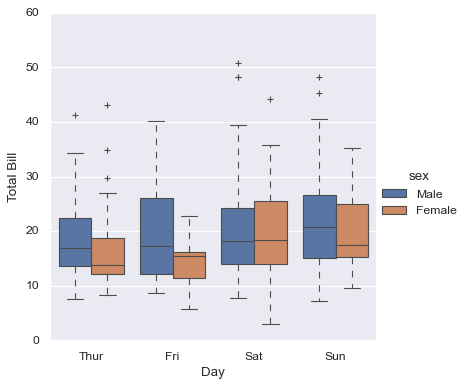

In [13]:
g=sns.catplot(
    x='day',
    y='total_bill',
    hue='sex',
    data=tips,
    kind='box'
    )
g.set_axis_labels('Day','Total Bill')

### Joint Distributions

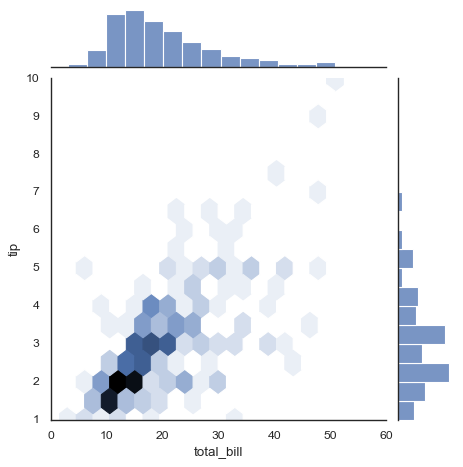

In [14]:
with sns.axes_style('white'):#Changes the parameter value for the indented code block
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression as shown in the following figure:

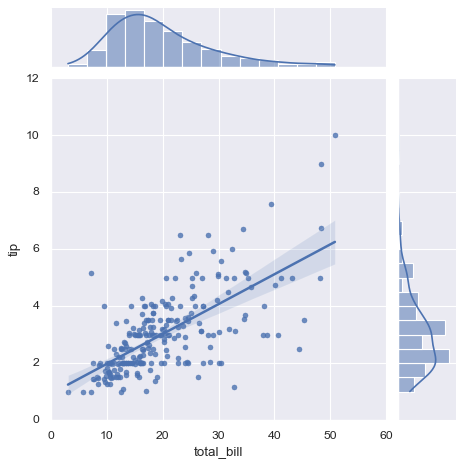

In [15]:
sns.jointplot(data=tips,x='total_bill',y='tip',kind='reg')

### Bar Plots

Time Series can be plotted using sns.factorplot. In the following example. we'll use the Planets dataset that we first saw in Aggregations and Grouping.

In [16]:
planets=sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


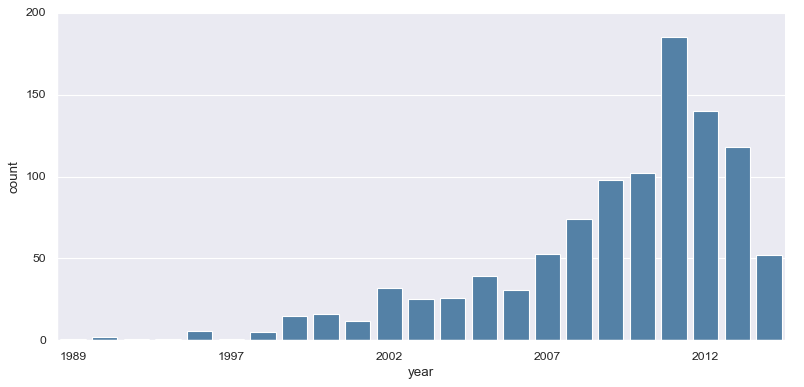

In [17]:
g=sns.catplot(
    data=planets,
    x='year',
    kind='count',
    color='steelblue',
    aspect=2
)
g.set_xticklabels(step=5)

c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

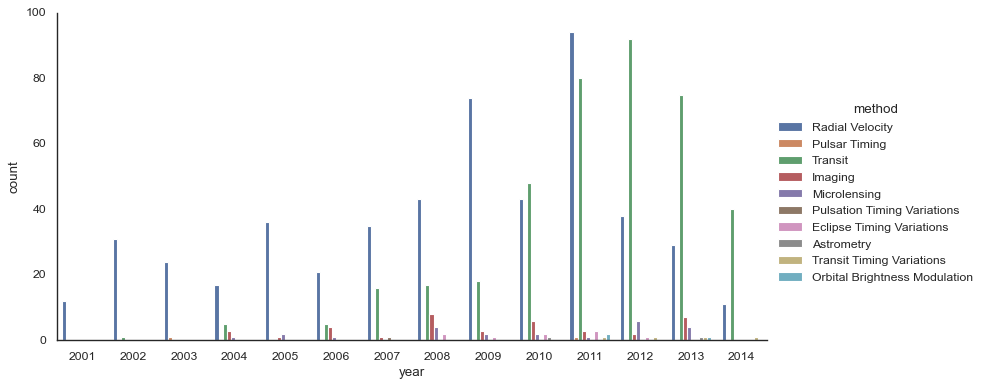

In [18]:
with sns.axes_style('white'):
    g=sns.catplot(
        x='year',
        data=planets,
        aspect=2,
        kind='count',
        hue='method',
        order=range(2001,2015)   
    )


# Example: Exploring Marathon Finishing Times

In [69]:
sns.set_style('darkgrid')

Let's try to analyze this data set that contains the finishing times of multiple players that competed in a marathon.

In [70]:
Marathon_Data=pd.read_csv('marathon-data.csv')

In [71]:
Marathon_Data['final']=pd.to_timedelta(Marathon_Data['final'])
Marathon_Data['split']=pd.to_timedelta(Marathon_Data['split'])
Marathon_Data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [72]:
Marathon_Data['final_sec']=Marathon_Data['final'].dt.total_seconds()
Marathon_Data['split_sec']=Marathon_Data['split'].dt.total_seconds()
Marathon_Data,Marathon_Data.dtypes

(       age gender           split           final  final_sec  split_sec
 0       33      M 0 days 01:05:38 0 days 02:08:51     7731.0     3938.0
 1       32      M 0 days 01:06:26 0 days 02:09:28     7768.0     3986.0
 2       31      M 0 days 01:06:49 0 days 02:10:42     7842.0     4009.0
 3       38      M 0 days 01:06:16 0 days 02:13:45     8025.0     3976.0
 4       31      M 0 days 01:06:32 0 days 02:13:59     8039.0     3992.0
 ...    ...    ...             ...             ...        ...        ...
 37245   18      M 0 days 04:24:24 0 days 09:32:57    34377.0    15864.0
 37246   36      M 0 days 04:35:43 0 days 09:33:28    34408.0    16543.0
 37247   51      M 0 days 04:22:35 0 days 09:33:40    34420.0    15755.0
 37248   55      W 0 days 04:58:06 0 days 10:00:40    36040.0    17886.0
 37249   58      W 0 days 04:59:49 0 days 10:01:08    36068.0    17989.0
 
 [37250 rows x 6 columns],
 age                    int64
 gender                object
 split        timedelta64[ns]
 fina

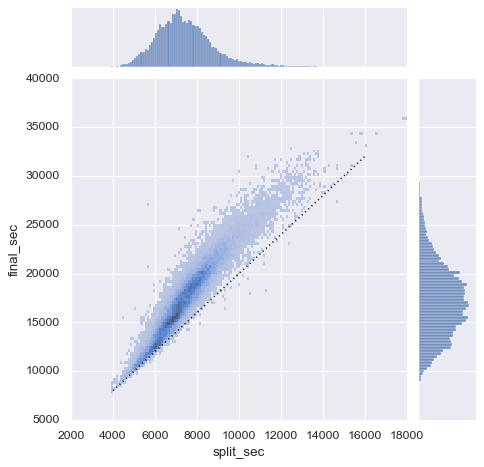

In [73]:
g = sns.jointplot(x='split_sec', y='final_sec', data=Marathon_Data, kind='hist')
g.ax_joint.plot(np.linspace(4000, 16000),np.linspace(8000, 32000), ':k')#Leterally plotting the points in an approximate line that might mirror the data's behavior. Not derived from any statistical estimation.

The dotted line shows the time trajectory a marathon runner would have had if, say, they were to run at a perfectly steady pace.

As the plot shows, most of the runners are above this line showing how people slow down in the second halves of the race.

Runners that have a higher pace at the second half of the race are said to have a negative-split

In [74]:
Marathon_Data['split_frac']=1-2*Marathon_Data['split_sec']/Marathon_Data['final_sec']# ==Marathon_Data['final_sec']-2*Marathon_Data['split_sec']/Marathon_Data['final_sec']

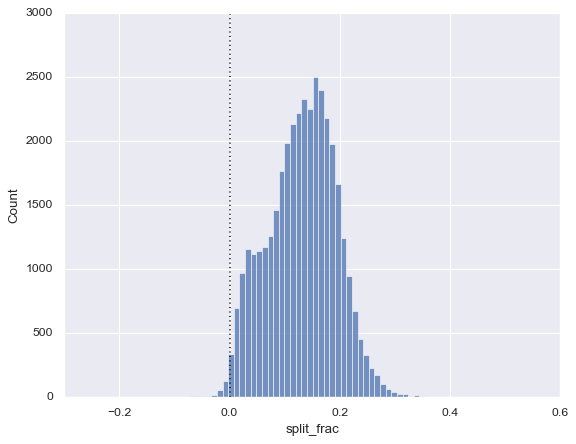

In [75]:
sns.histplot(Marathon_Data['split_frac'],bins=80)
plt.axvline(0,color='k',linestyle=':')

Below is the percentage of people who have a negative split during this marathon

In [76]:
(Marathon_Data['split_frac']<0).mean()*100

0.6738255033557047

Let's now see the correlation of split_frac with all the other variables.

In [77]:
Marathon_Data

,age,gender,split,final,final_sec,split_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,7731.0,3938.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,7768.0,3986.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,7842.0,4009.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,8025.0,3976.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,8039.0,3992.0,0.006842
...,...,...,...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57,34377.0,15864.0,0.077057
37246,36,M,0 days 04:35:43,0 days 09:33:28,34408.0,16543.0,0.038421
37247,51,M,0 days 04:22:35,0 days 09:33:40,34420.0,15755.0,0.084544
37248,55,W,0 days 04:58:06,0 days 10:00:40,36040.0,17886.0,0.007436


c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

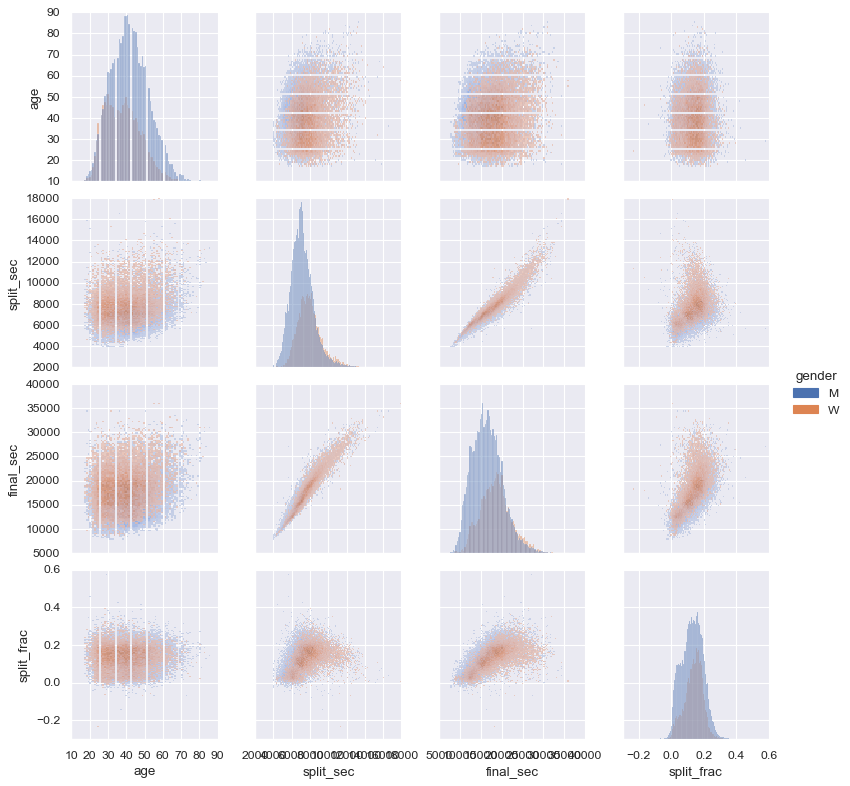

In [78]:
g=sns.pairplot(
    data=Marathon_Data,
    vars=['age','split_sec','final_sec','split_frac'],
    hue='gender',
    kind='hist',
    plot_kws={'alpha': 0.7,}
)

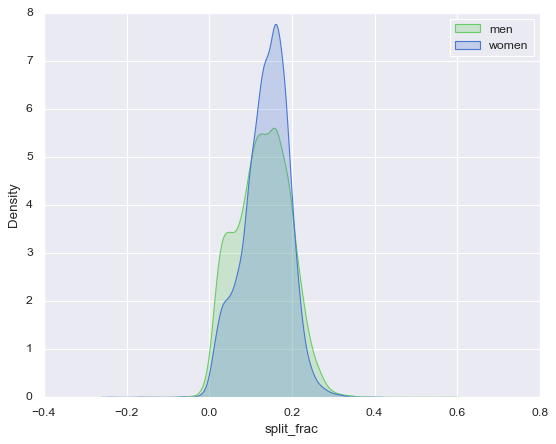

In [93]:
sns.kdeplot(Marathon_Data['split_frac'][Marathon_Data['gender']=='M'], label='men', fill=True,color='g')
sns.kdeplot(Marathon_Data['split_frac'][Marathon_Data['gender']=='W'], label='women', fill=True,color='b')
plt.legend()
plt.xlabel('split_frac');

It's clear how the men are closer to running an even split than women. The plot also looks like a bimodal distribution.

<Axes: xlabel='gender', ylabel='split_frac'>

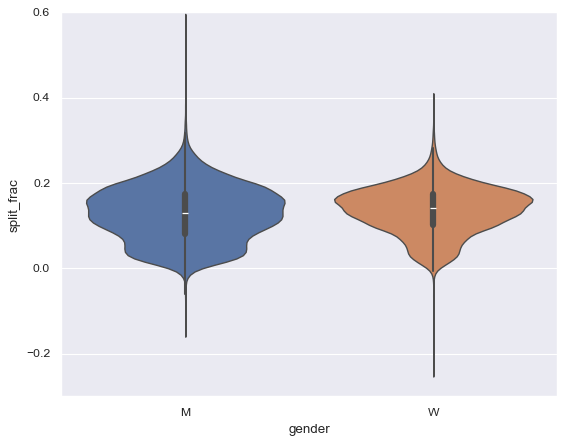

In [87]:
sns.violinplot(
    data=Marathon_Data,
    x='gender',
    y='split_frac',
    hue='gender'
    
)

Let's now further compare the split_frac as a function of age groups.

In [96]:
Marathon_Data['age_group']=(Marathon_Data['age']//10)*10
Marathon_Data

,age,gender,split,final,final_sec,split_sec,split_frac,age_group
0,33,M,0 days 01:05:38,0 days 02:08:51,7731.0,3938.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,7768.0,3986.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,7842.0,4009.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,8025.0,3976.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,8039.0,3992.0,0.006842,30
...,...,...,...,...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57,34377.0,15864.0,0.077057,10
37246,36,M,0 days 04:35:43,0 days 09:33:28,34408.0,16543.0,0.038421,30
37247,51,M,0 days 04:22:35,0 days 09:33:40,34420.0,15755.0,0.084544,50
37248,55,W,0 days 04:58:06,0 days 10:00:40,36040.0,17886.0,0.007436,50


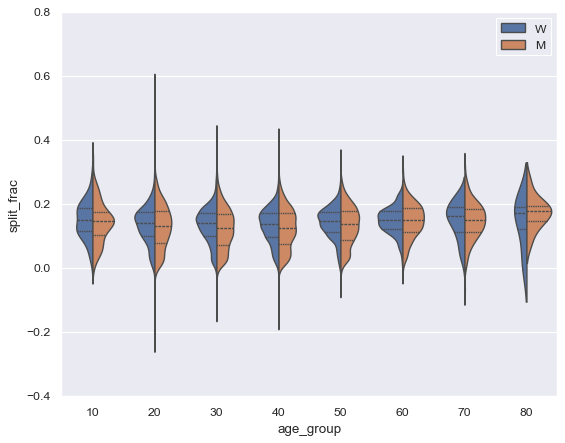

In [102]:
sns.violinplot(
    data=Marathon_Data,
    x='age_group',
    y='split_frac',
    hue='gender',
    split=True,
    inner='quartile'
)


Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range: